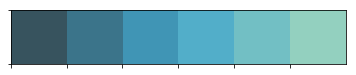

In [1]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-colorblind')
sns.palplot(sns.color_palette("GnBu_d"))

import pandas as pd
import numpy as np

In [2]:
# test_df = pd.read_csv(r'data/output_final.csv')
test_df = pd.read_pickle(path=r'data/new_output_final.bz2', compression='bz2')

In [50]:
revisions = pd.read_csv(r'../../data/sme/revisions.csv')

In [63]:
page_ids = test_df.page_id.unique()
revs = revisions[revisions.page_id.isin(page_ids)]

revs.groupby(by='page_id').size().to_frame().to_csv(r'data/385_page_revs.csv')

In [3]:
categories = test_df.category.unique()
def fill_subplots():
    for category in categories:
        print(category)

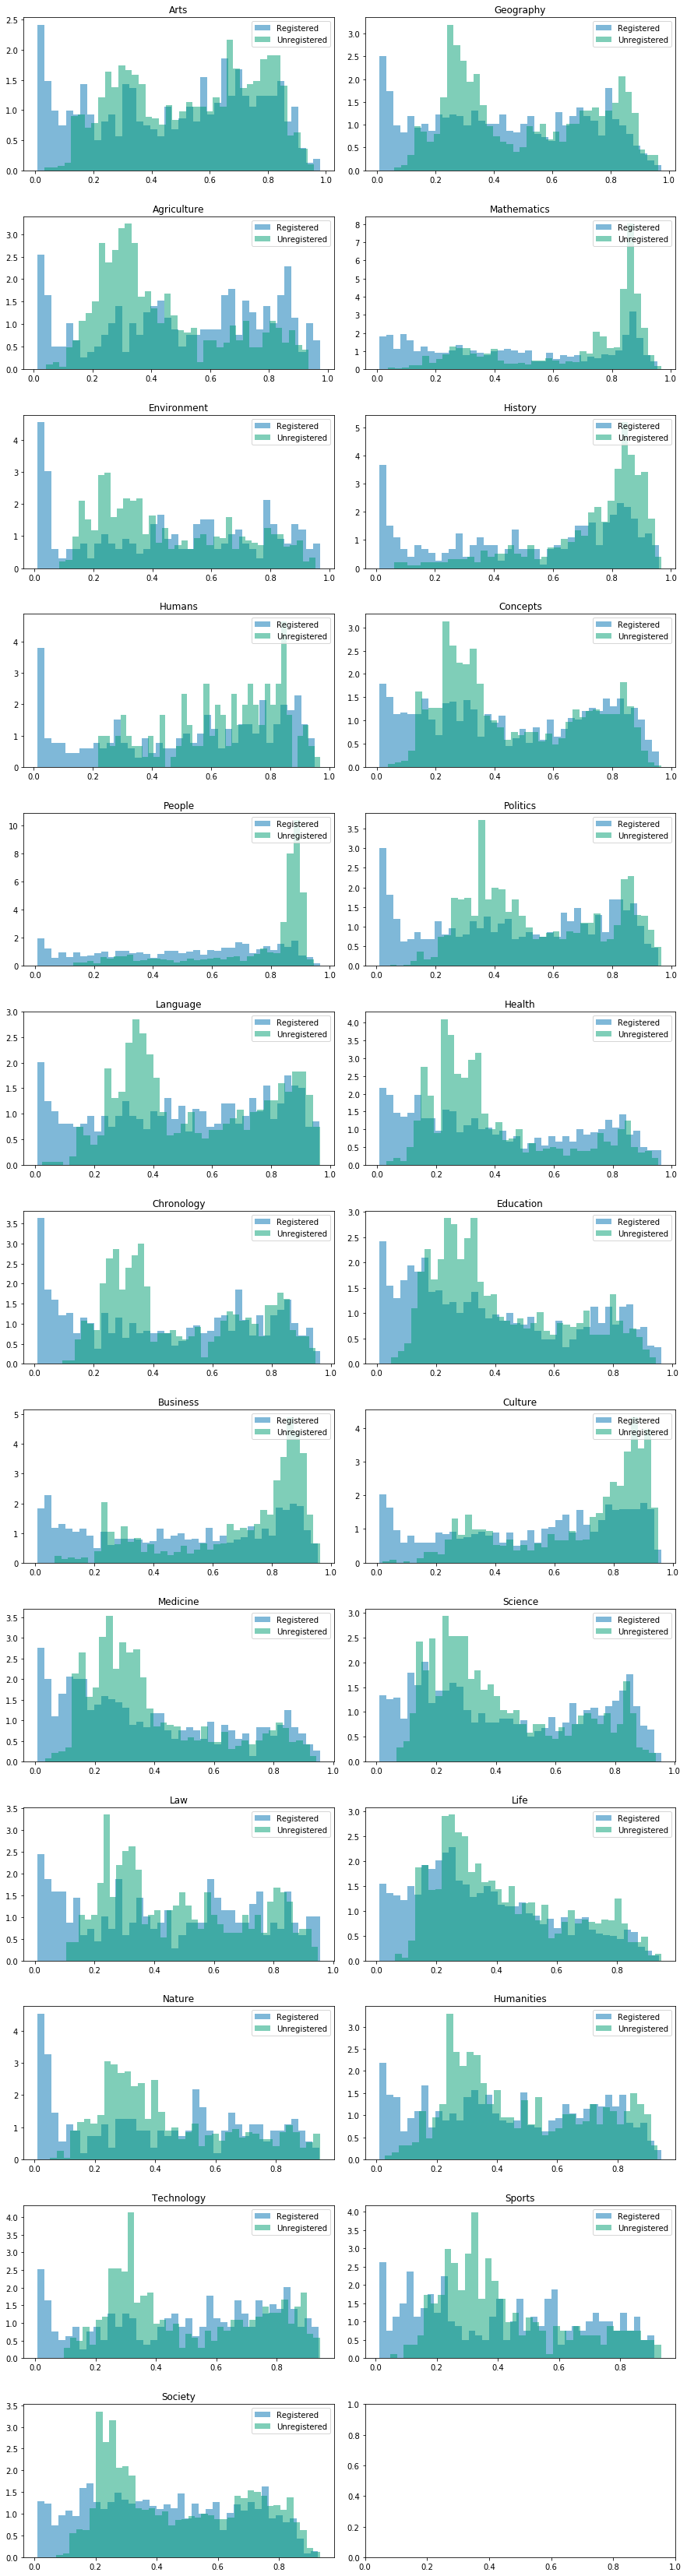

In [4]:
bins = 40
categories = test_df.category.unique()
f, axes = plt.subplots(13, 2, sharex=False, sharey=False, figsize=(15,60))


def fill_subplots():
    row = 0
    col = 0
    for category in categories:
        if pd.isnull(category):
            continue
        x = test_df[(test_df.category==category) & (test_df.registered==True)]['expert']
        y = test_df[(test_df.category==category) & (test_df.registered==False)]['expert']

        axes[row,col].hist(x, bins, alpha=0.5, label='Registered', density=True)
        axes[row,col].hist(y, bins, alpha=0.5, label='Unregistered', density=True)
        axes[row,col].set_title('{}'.format(category))
        axes[row,col].legend(loc="upper right")
        
        if col > 0:
            row += 1
            col = 0
        else:
            col += 1
            

    f.subplots_adjust(hspace=0.3, wspace=0.1)

fill_subplots()
# f.figure()
# f.legend(handles=[axes[0,0]])

# axes[0, 0].plot(x, y)
# ax1.plot(xtr, color='r', label='HHZ 1')
# ax1.legend(loc="upper right")
# ax2.plot(xtr, color='r', label='HHN')
# ax2.legend(loc="upper right")
# ax3.plot(xtr, color='r', label='HHE')
# ax3.legend(loc="upper right")


# reg_hist = plt.hist(x, bins, alpha=0.5, label='Registered', normed=True)
# unreg_hist = plt.hist(y, bins, alpha=0.5, label='Unregistered', normed=True)

# plt.ylabel('Number')
# plt.xlabel('Probability')
# plt.title('Registered vs. Non-Registered Expertise Probability')
# plt.legend()
# plt.show()
# plot_url = py.plot_mpl(histogram, filename='docs/histogram-mpl-same')

In [5]:
thresholds = list(range(75, 100, 1))

cols = ['threshold', 
        '#<user,page>', 
        '# of distinct users', 
        '%<user,page> of total population', 
        'page edits (mean)', 
        'page edits (count)',
        'total page edits (#revisions)']
rows = []
for threshold in thresholds:
    threshold_str = '{}%'.format(threshold)
    threshold = threshold / 100
    
    unique_users_above_threshold = len(test_df[test_df.expert > threshold]['user'].unique())
    user_page_pairs_above_threshold = len(test_df[test_df.expert > threshold])
    total_user_page_pairs = len(test_df)
    page_edit_mean_above_threshold = np.round(np.average(test_df[test_df.expert > threshold]['page_edits']), 2)
    total_page_edits_above_threshold = np.round(np.sum(test_df[test_df.expert > threshold]['page_edits']), 2)
    total_page_edits = np.round(np.sum(test_df['page_edits']), 2)
                       
    rows.append([threshold_str,
                 user_page_pairs_above_threshold,
                 unique_users_above_threshold,
                 user_page_pairs_above_threshold / total_user_page_pairs,
                 page_edit_mean_above_threshold,
                 total_page_edits_above_threshold,
                 total_page_edits])

df = pd.DataFrame(rows, columns=cols)
df.to_csv(r'data/new_precision_threshold.csv', index=False)
df.head(25)
    
#     print('experts > {}%: {}'.format(threshold*100, len(test_df[test_df.expert > threshold])))
#     print('unique experts > {}%: {}'.format(threshold*100, len(test_df[test_df.expert > threshold]['user'].unique())))
#     print('% experts > {}% of total population: {}'.format(threshold*100, np.round(len(test_df[test_df.expert > threshold])/len(test_df), 4)))
#     print('experts > {}% page edits average: {}'.format(threshold*100, np.round(np.average(test_df[test_df.expert > threshold]['page_edits']), 2)))
#     print('experts > {}% page edits total: {}'.format(threshold*100, np.round(np.sum(test_df[test_df.expert > threshold]['page_edits']), 2)))
#     print('page edits total: {}'.format(np.round(np.sum(test_df['page_edits']), 2)))
    

/home/yarov/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/yarov/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,threshold,"#<user,page>",# of distinct users,"%<user,page> of total population",page edits (mean),page edits (count),total page edits (#revisions)
0,75%,10117,9821,0.241710,3.16,31924.0,89361.0
1,76%,9665,9395,0.230911,3.18,30770.0,89361.0
2,77%,9192,8941,0.219610,3.20,29443.0,89361.0
3,78%,8744,8517,0.208907,3.24,28354.0,89361.0
4,79%,8253,8044,0.197176,3.26,26934.0,89361.0
5,80%,7739,7554,0.184896,3.32,25665.0,89361.0
6,81%,7257,7095,0.173380,3.23,23476.0,89361.0
7,82%,6746,6601,0.161172,3.30,22268.0,89361.0
8,83%,6216,6087,0.148509,3.39,21067.0,89361.0
9,84%,5562,5450,0.132884,3.48,19331.0,89361.0


In [27]:
# test_df.user
all_users = test_df.user.unique()
above80_users = test_df[test_df.expert > 0.8].user.unique()
under80_users = test_df[test_df.expert <= 0.8].user.unique()

total_edits_df = pd.read_hdf(path_or_buf=r'../../data/sme/user_total_edits.h5')
total_edits_df.rename(columns={'user_name': 'user'}, inplace=True)
total_edits_df.head()

,user,total_edits
0,!dea4u,2780
1,!melquiades,138
2,"""alyosha""",652
3,$1LENCE D00600D,15410
4,$?,10


In [28]:
user_total_edits = total_edits_df[total_edits_df.user.isin(all_users)]

In [15]:
sme_total_edits = total_edits_df[total_edits_df.user.isin(above80_users)]
sme_total_edits.to_csv(r'data/sme_total_edits.csv', index=False)
sme_total_edits.describe().T

,count,mean,std,min,25%,50%,75%,max
total_edits,7496.0,2854.002535,20870.816583,1.0,4.0,13.0,113.0,910458.0


In [30]:
print(len(sme_total_edits[sme_total_edits.total_edits >= 10000])/len(sme_total_edits)*100)
print(len(user_total_edits[user_total_edits.total_edits >= 10000])/len(user_total_edits)*100)

5.016008537886873
7.312629871054055


In [16]:
unknown_total_edits = total_edits_df[total_edits_df.user.isin(under80_users)]
unknown_total_edits.to_csv(r'data/unknown_total_edits.csv', index=False)
unknown_total_edits.describe().T

,count,mean,std,min,25%,50%,75%,max
total_edits,28002.0,4651.164595,28588.118738,1.0,2.0,19.0,663.0,2040936.0


In [31]:
# total_edits_df[total_edits_df.user.isin(above80_users) & (total_edits_df.total_edits > 50000)]

user_roles = pd.read_excel('data/User_Role_MidLevel.xlsx')
user_roles.head()

,User_ID,Level_Date,Last_Date_Role,Days_In_Role,Med_Level_Concate
0,*drew,2004-08-08 02:52:41,2012-06-20 07:38:38,2873,New Registered Users
1,-js-,2006-01-26 21:07:09,2012-06-20 07:51:50,2336,New Registered Users
2,-Majestic-,2006-03-16 19:32:09,2008-05-22 11:55:00,798,New Registered Users
3,-Majestic-,2008-05-22 11:55:00,2010-06-18 02:10:00,757,"New Registered Users,Border Control"
4,-Majestic-,2010-06-18 02:10:00,2012-06-20 07:45:24,733,"New Registered Users,Border Control,Quality As..."


In [32]:
nru = 'New Registered Users'
uru = 'unregistered users'

def is_core_user(text):
    roles = text.split(',')
    if (nru in roles or uru in roles) and len(roles) == 1:
        return False
    return True

user_roles['is_core_user'] = user_roles['Med_Level_Concate'].apply(lambda x: is_core_user(x))
# user_roles.head(20)

In [33]:
print(sme_total_edits.shape)
merged = sme_total_edits.merge(user_roles, left_on='user', right_on='User_ID', how='inner')
print(merged.shape)

(7496, 2)
(184, 8)


In [39]:
core_users = merged[merged.is_core_user].user.unique()
len(total_edits_df[total_edits_df.user.isin(core_users)].user.unique())/len(user_total_edits.user.unique())

0.0015940337593578322

In [23]:
# merged[['user', 'total_edits', 'Med_Level_Concate']].to_csv('data/sme_user_roles.csv', index=False)

In [23]:
# for ur in user_roles['Med_Level_Concate']:
#     print(ur)

In [36]:
core_users = user_roles[user_roles.is_core_user]['User_ID'].unique()

total_edits_df[total_edits_df.user.isin(above80_users) & total_edits_df.user.isin(core_users)].to_csv(r'data/core_users.csv', index=False)

In [ ]:
# feature importance by weight
feature_names = ['page_edit_dist',
                 'ns0_edit_dist',
                 'summary_similarity',
                 'categories_overlap',
                 'links_overlap',
                 'title_similarity',
                 'mean_edit_size',
                 'avg_persistence',
                 'page_edits_ratio',
                 'content_token_vs_token'
                ]

experts_df = test_df[test_df.evaluation == 'expert']
print(len(experts_df))
non_experts_df = test_df[test_df.evaluation == 'not_expert']
print(len(non_experts_df))

feature_rows = []
for f_name in feature_names:
    feature_rows.append([f_name, np.average(experts_df[f_name]), np.average(non_experts_df[f_name])])

feat_df = pd.DataFrame(feature_rows, columns=['Feature', 'Expert', 'Non-Expert'])
feat_df.head(20)
feat_df.to_excel(r'd:/temp/feature_importance_by_weight.xlsx', index=False)